# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

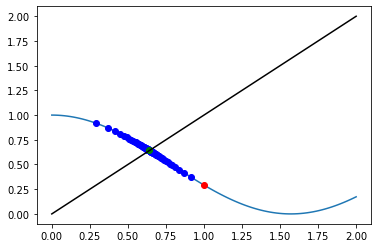

In [46]:
from pylab import plot,show
from numpy import array,linspace,sqrt,cos
from numpy.linalg import norm

def fixedp(f,x0,tol=10e-4,maxiter=200):
 """ Fixed point algorithm """
 e = 1
 itr = 0
 xp = []
 while(e > tol and itr < maxiter):
  x = f(x0)      # fixed point equation
  e = norm(x0-x) # error at the current step
  x0 = x
  xp.append(x0)  # save the solution of the current step
  itr = itr + 1
 return x,xp


f = lambda x : (cos(x))**2

x_start = 1
xf,xp = fixedp(f,x_start)

x = linspace(0,2,100)
y = f(x)
plot(x,y,xp,f(xp),'bo',
     x_start,f(x_start),'ro',xf,f(xf),'go',x,x,'k')
show()

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [47]:
print(xf, len(xp))

0.6412273438135871 143


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [1]:
def inv_quad_interpolation(func, point_0, point_1, point_3, eps):
# ... ENTER YOUR CODE HERE ...

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [1]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

def ma_fonction(x):
    y = (x ** 3) - 1
    return (y)

def ma_derivee(x):
    y = 3 * (x ** 2) 
    return (y)

def NewtonsMethod( x, epsilon=0.000001):
    n   = 0
    dif = 2 * epsilon 
    while dif > epsilon :
        x1   = x - ma_fonction(x) / ma_derivee(x)
        dif  = abs(x1 - x)
        x    = x1
        n    = n+1
    return (x, n)


x     = complex(input())


(x,n) = NewtonsMethod(x)

print(x) 
print(n)

tab_x = np.linspace(-6,6,100)
tab_y = ma_fonction(tab_x)

plt.figure()
plt.plot(tab_x,tab_y, color='red')
plt.grid()
plt.show()

Quelle est la valeur de départ ? : 1+j
(0.9999999999999994-4.556244651765188e-16j)
8


<Figure size 640x480 with 1 Axes>

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).